In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [3]:
rng = np.random.RandomState(1)

# rand based on uniform distribution, randn based on normal distribution
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T



In [4]:
X.shape

(200, 2)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

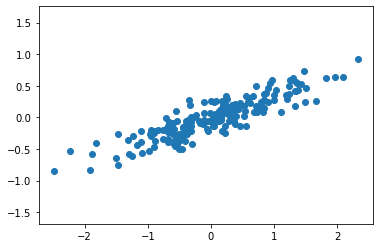

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [8]:
# vector, direction
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [9]:
# length of first and second pca, variance
pca.explained_variance_

array([0.7625315, 0.0184779])

In [10]:
def draw_vector(v0, v1):
    # gca means plot on the axis
    ax = plt.gca()
    
    ax.annotate('',
               v1,
               v0,
               arrowprops=dict(arrowstyle='->', linewidth=2))

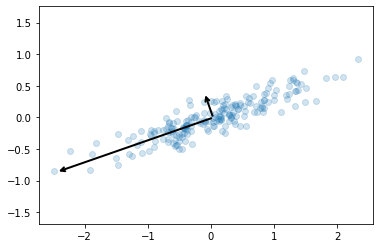

In [11]:
plt.scatter(X[:,0], X[:,1], alpha=0.2)

for vector, length in zip(pca.components_, pca.explained_variance_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal');

In [12]:
pca = PCA(n_components = 1)
pca.fit(X)

X_pca = pca.transform(X)

print("original shape:", X.shape)
print("transformed shape:", X_pca.shape)

original shape: (200, 2)
transformed shape: (200, 1)


In [13]:
X_new = pca.inverse_transform(X_pca)
X_new.shape

(200, 2)

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389316,
 1.0060642308539953)

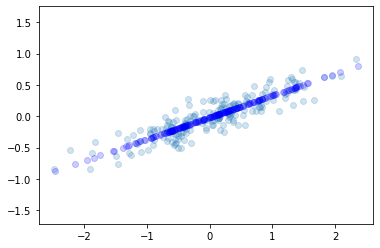

In [14]:
plt.scatter(X[:,0], X[:,1],alpha=0.2) # ori
plt.scatter(X_new[:,0], X_new[:,1],color='b',alpha=0.2) # inverse transform

plt.axis('equal')

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
pca = PCA(n_components = 2)
pca.fit(digits.data)

projected = pca.transform(digits.data)

# reduce dimentions from 64 to 2
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


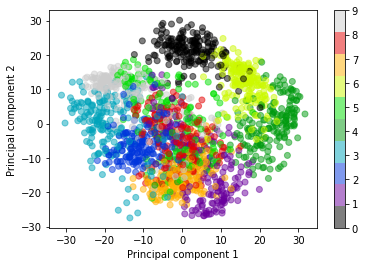

In [18]:
plt.scatter(projected[:,0], projected[:,1], 
            c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral', 10)
            ,alpha=0.5)

plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.colorbar()


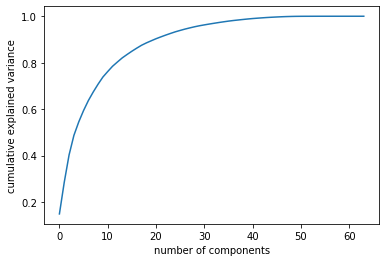

In [20]:
pca = PCA()
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [22]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
print(data.feature_names)
print(data.target_names)
print(X.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


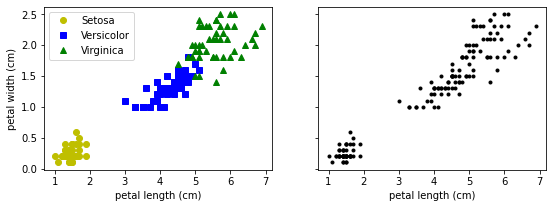

In [24]:
plt.figure(figsize=(9,3))

# one row, two col, first subplot
# bs blue square
# g^ green triangular
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo', label='Setosa')
plt.plot(X[y==1, 2], X[y==1, 3], 'bs', label='Versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'g^', label='Virginica')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()


plt.subplot(122)
plt.scatter(X[:,2],X[:,3], c='k',marker='.')
plt.xlabel("petal length (cm)")
plt.tick_params(labelleft=False)

plt.show()

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# remark : need to do train test split
pred = kmeans.predict(X)

mapping = np.array([1,0,2])
y_pred = np.array([mapping[cluster_id]for cluster_id in pred])

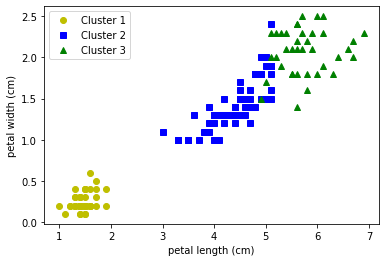

In [27]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], 'yo', label='Cluster 1')
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], 'bs', label='Cluster 2')
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], 'g^', label='Cluster 3')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [28]:
np.sum(y_pred == y)

134

In [29]:
np.sum(y_pred == y) / len(y)

0.8933333333333333

In [30]:
# sum of the squared distances between each training instance
# and its closest centroid.

kmeans.inertia_

78.851441426146

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1,6)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


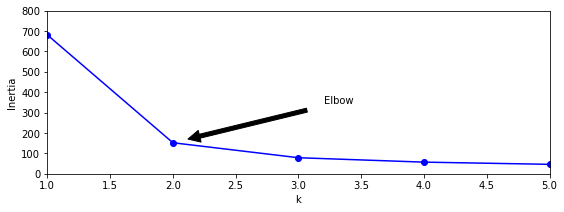

In [34]:
plt.figure(figsize=(9,3))

plt.plot(range(1,6), inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.annotate('Elbow',
            xy=(2, inertias[1]),
            xytext=(0.5,0.5),
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.1))

plt.axis([1,5,0,800])

plt.show()

# Elbow method, choose 2, it is good enough, if label not given
# we use this to determine n

In [37]:
# 1 gaussian model/ represent 1 cluster

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# remark : need to do train test split
pred = gmm.predict(X)

mapping = np.array([2,0,1])
y_pred = np.array([mapping[cluster_id]for cluster_id in pred])

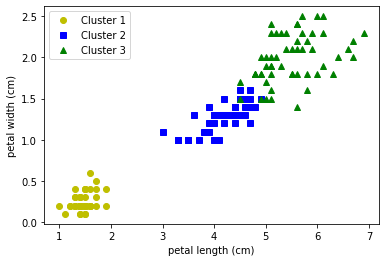

In [38]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], 'yo', label='Cluster 1')
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], 'bs', label='Cluster 2')
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], 'g^', label='Cluster 3')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [39]:
# performance become better

np.sum(y_pred == y)

145

In [41]:
# performance
np.sum(y_pred == y) / len(y)

0.9666666666666667